# 🎓 Week 7 - Day 3: Anomaly Detection

## Today's Goals:
✅ Implement Isolation Forest for anomaly detection

✅ Detect outliers in real datasets

✅ Visualize anomalies effectively

✅ Compare anomaly detection with classification

---

## 📦 Setup: Import Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
import warnings

# Settings
warnings.filterwarnings('ignore')
np.random.seed(42)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries imported successfully!")
print(f"📊 NumPy version: {np.__version__}")
print(f"📊 Pandas version: {pd.__version__}")

✅ Libraries imported successfully!
📊 NumPy version: 1.26.4
📊 Pandas version: 2.2.2


---
## Part 1: Understanding Anomalies with Synthetic Data 🎯

Let's create a simple dataset where we can clearly see normal points and anomalies!

✅ Generated 300 normal points
⚠️ Added 20 anomalies
📊 Total data points: 320


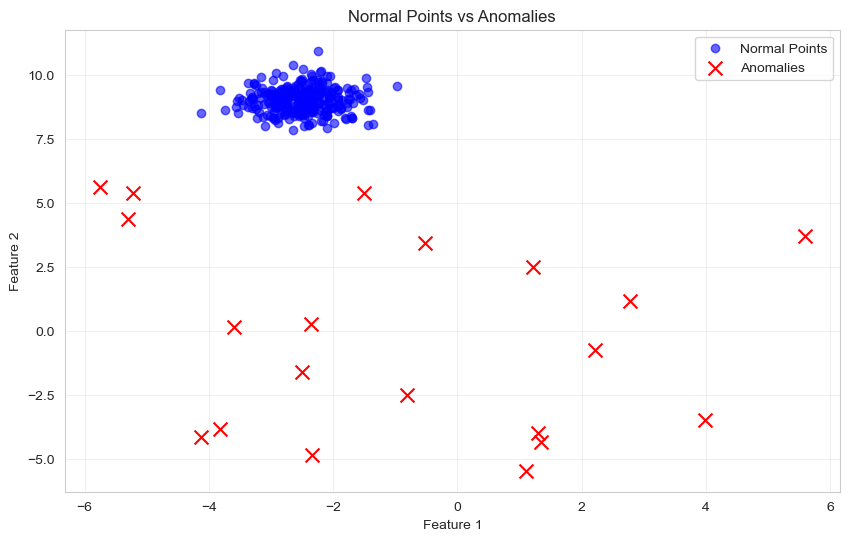


💡 Notice how anomalies are far from the cluster of normal points!


In [2]:
# Create normal data (clustered points)
X_normal, _ = make_blobs(n_samples=300, centers=1, cluster_std=0.5, random_state=42)

# Add some anomalies (outliers)
X_anomalies = np.random.uniform(low=-6, high=6, size=(20, 2))

# Combine normal and anomalies
X = np.vstack([X_normal, X_anomalies])

print(f"✅ Generated {len(X_normal)} normal points")
print(f"⚠️ Added {len(X_anomalies)} anomalies")
print(f"📊 Total data points: {len(X)}")

# Visualize the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:300, 0], X[:300, 1], c='blue', alpha=0.6, label='Normal Points')
plt.scatter(X[300:, 0], X[300:, 1], c='red', s=100, marker='x', label='Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Normal Points vs Anomalies')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n💡 Notice how anomalies are far from the cluster of normal points!")

---
## Part 2: Applying Isolation Forest 🌲

Now let's use Isolation Forest to automatically detect these anomalies!

In [3]:
# Create Isolation Forest model
iso_forest = IsolationForest(
    contamination=0.1,  # Expected proportion of anomalies (10%)
    random_state=42,
    n_estimators=100    # Number of trees
)

# Fit the model and predict
predictions = iso_forest.fit_predict(X)

# Convert predictions: -1 = anomaly, 1 = normal
# Let's make it more intuitive: 0 = normal, 1 = anomaly
anomaly_labels = (predictions == -1).astype(int)

print("✅ Isolation Forest model trained!")
print(f"\n📊 Results:")
print(f"  Normal points detected: {np.sum(anomaly_labels == 0)}")
print(f"  Anomalies detected: {np.sum(anomaly_labels == 1)}")

# Get anomaly scores (lower = more anomalous)
anomaly_scores = iso_forest.score_samples(X)
print(f"\n📈 Anomaly scores range: [{anomaly_scores.min():.3f}, {anomaly_scores.max():.3f}]")
print("   (Lower scores = more likely to be anomalies)")

✅ Isolation Forest model trained!

📊 Results:
  Normal points detected: 288
  Anomalies detected: 32

📈 Anomaly scores range: [-0.770, -0.346]
   (Lower scores = more likely to be anomalies)


---
## Part 3: Visualizing Detection Results 📊

Let's see how well Isolation Forest identified the anomalies!

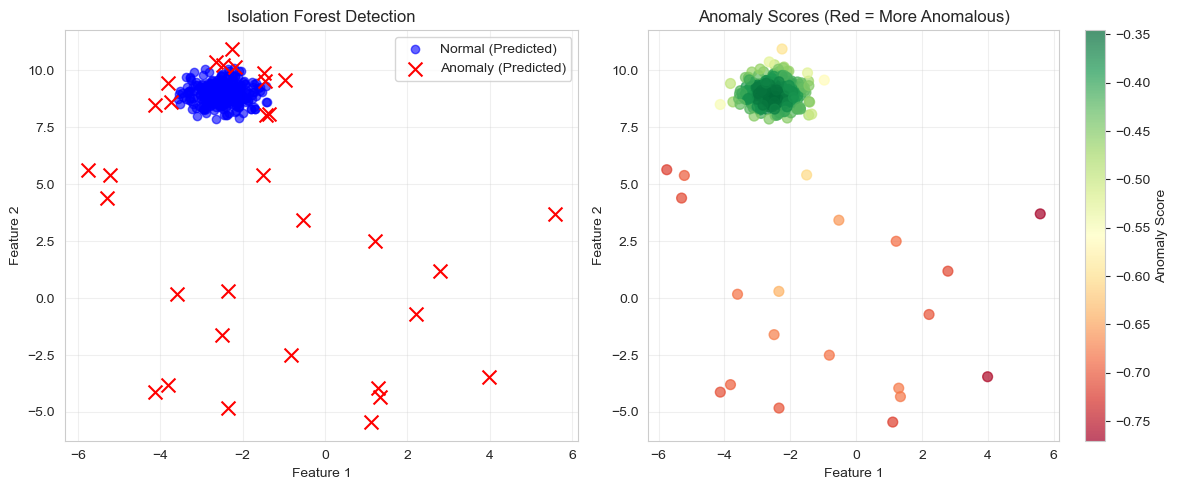

✅ Visualization complete!

💡 Lower scores (red) = higher chance of being anomaly
💡 Higher scores (green) = more likely normal


In [4]:
# Visualize predictions
plt.figure(figsize=(12, 5))

# Plot 1: Detection Results
plt.subplot(1, 2, 1)
plt.scatter(X[anomaly_labels == 0, 0], X[anomaly_labels == 0, 1], 
           c='blue', alpha=0.6, label='Normal (Predicted)')
plt.scatter(X[anomaly_labels == 1, 0], X[anomaly_labels == 1, 1], 
           c='red', s=100, marker='x', label='Anomaly (Predicted)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Isolation Forest Detection')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Anomaly Scores
plt.subplot(1, 2, 2)
scatter = plt.scatter(X[:, 0], X[:, 1], c=anomaly_scores, 
                     cmap='RdYlGn', s=50, alpha=0.7)
plt.colorbar(scatter, label='Anomaly Score')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Anomaly Scores (Red = More Anomalous)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visualization complete!")
print("\n💡 Lower scores (red) = higher chance of being anomaly")
print("💡 Higher scores (green) = more likely normal")

---
## Part 4: Evaluating Detection Performance 🎯

Let's check how accurately we detected the anomalies!

In [5]:
# Create true labels (we know first 300 are normal, last 20 are anomalies)
true_labels = np.array([0]*300 + [1]*20)

# Calculate metrics
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
cm = confusion_matrix(true_labels, anomaly_labels)

print("📊 Confusion Matrix:")
print("="*40)
print(f"                 Predicted")
print(f"              Normal  Anomaly")
print(f"Actual Normal    {cm[0,0]:3d}      {cm[0,1]:3d}")
print(f"     Anomaly     {cm[1,0]:3d}      {cm[1,1]:3d}")
print("="*40)

# Calculate accuracy
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print(f"\n✅ Overall Accuracy: {accuracy*100:.1f}%")

# Detailed report
print("\n📋 Detailed Classification Report:")
print(classification_report(true_labels, anomaly_labels, 
                          target_names=['Normal', 'Anomaly']))

# Calculate detection rate
true_positives = cm[1, 1]  # Correctly identified anomalies
false_negatives = cm[1, 0]  # Missed anomalies
detection_rate = true_positives / (true_positives + false_negatives)

print(f"\n🎯 Anomaly Detection Rate: {detection_rate*100:.1f}%")
print(f"   (Caught {true_positives} out of 20 anomalies)")

📊 Confusion Matrix:
                 Predicted
              Normal  Anomaly
Actual Normal    288       12
     Anomaly       0       20

✅ Overall Accuracy: 96.2%

📋 Detailed Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      0.96      0.98       300
     Anomaly       0.62      1.00      0.77        20

    accuracy                           0.96       320
   macro avg       0.81      0.98      0.87       320
weighted avg       0.98      0.96      0.97       320


🎯 Anomaly Detection Rate: 100.0%
   (Caught 20 out of 20 anomalies)


---
## Part 5: Real-World Example - Credit Card Fraud Detection 💳

Let's apply anomaly detection to a more realistic scenario!

✅ Credit card transaction data created!
   Normal transactions: 1000
   Fraudulent transactions: 50


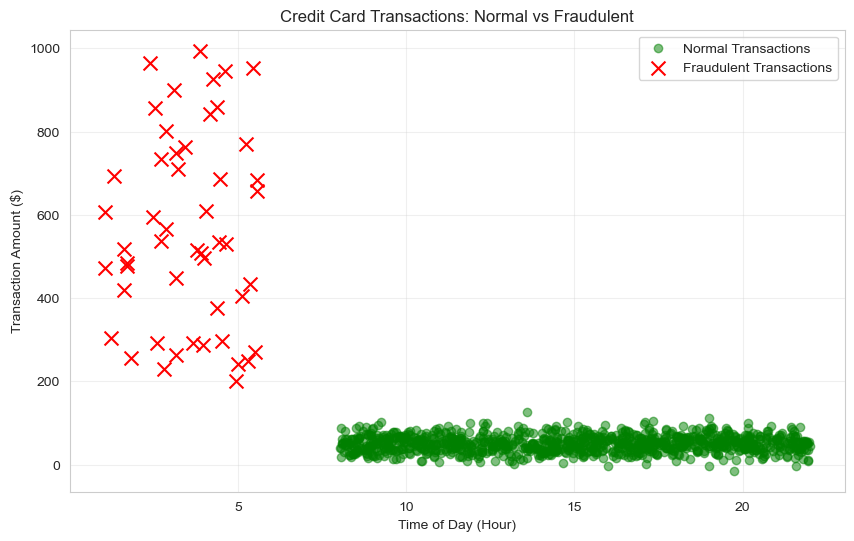


💡 Notice: Fraudulent transactions are typically:
   • Higher amounts ($200-$1000)
   • Unusual times (1am-6am)


In [6]:
# Create synthetic credit card transaction data
np.random.seed(42)

# Normal transactions
n_normal = 1000
normal_amounts = np.random.normal(loc=50, scale=20, size=n_normal)  # Average $50
normal_times = np.random.uniform(low=8, high=22, size=n_normal)     # 8am to 10pm

# Fraudulent transactions (anomalies)
n_fraud = 50
fraud_amounts = np.random.uniform(low=200, high=1000, size=n_fraud)  # High amounts
fraud_times = np.random.uniform(low=1, high=6, size=n_fraud)         # Late night (1am-6am)

# Combine data
amounts = np.concatenate([normal_amounts, fraud_amounts])
times = np.concatenate([normal_times, fraud_times])
X_credit = np.column_stack([amounts, times])

# True labels
y_true = np.array([0]*n_normal + [1]*n_fraud)

print("✅ Credit card transaction data created!")
print(f"   Normal transactions: {n_normal}")
print(f"   Fraudulent transactions: {n_fraud}")

# Visualize transactions
plt.figure(figsize=(10, 6))
plt.scatter(times[:n_normal], amounts[:n_normal], 
           c='green', alpha=0.5, label='Normal Transactions')
plt.scatter(times[n_normal:], amounts[n_normal:], 
           c='red', s=100, marker='x', label='Fraudulent Transactions')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Transaction Amount ($)')
plt.title('Credit Card Transactions: Normal vs Fraudulent')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n💡 Notice: Fraudulent transactions are typically:")
print("   • Higher amounts ($200-$1000)")
print("   • Unusual times (1am-6am)")

---
## Part 6: Detecting Credit Card Fraud 🔍

Let's use Isolation Forest to detect fraudulent transactions!

In [7]:
# Train Isolation Forest on credit card data
fraud_detector = IsolationForest(
    contamination=0.05,  # Expect ~5% fraud
    random_state=42
)

# Fit and predict
fraud_predictions = fraud_detector.fit_predict(X_credit)
fraud_labels = (fraud_predictions == -1).astype(int)

print("✅ Fraud detection model trained!")
print(f"\n📊 Detection Results:")
print(f"   Normal transactions: {np.sum(fraud_labels == 0)}")
print(f"   Flagged as fraud: {np.sum(fraud_labels == 1)}")

# Evaluate performance
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, fraud_labels)
recall = recall_score(y_true, fraud_labels)
f1 = f1_score(y_true, fraud_labels)

print(f"\n🎯 Performance Metrics:")
print(f"   Precision: {precision*100:.1f}% (of flagged transactions, how many are actually fraud)")
print(f"   Recall: {recall*100:.1f}% (of actual frauds, how many did we catch)")
print(f"   F1-Score: {f1*100:.1f}% (overall balance)")

# Show confusion matrix
cm_fraud = confusion_matrix(y_true, fraud_labels)
print(f"\n📊 Fraud Detection Matrix:")
print(f"   True Negatives (Normal → Normal): {cm_fraud[0,0]}")
print(f"   False Positives (Normal → Fraud): {cm_fraud[0,1]}")
print(f"   False Negatives (Fraud → Normal): {cm_fraud[1,0]}")
print(f"   True Positives (Fraud → Fraud): {cm_fraud[1,1]}")

✅ Fraud detection model trained!

📊 Detection Results:
   Normal transactions: 997
   Flagged as fraud: 53

🎯 Performance Metrics:
   Precision: 94.3% (of flagged transactions, how many are actually fraud)
   Recall: 100.0% (of actual frauds, how many did we catch)
   F1-Score: 97.1% (overall balance)

📊 Fraud Detection Matrix:
   True Negatives (Normal → Normal): 997
   False Positives (Normal → Fraud): 3
   False Negatives (Fraud → Normal): 0
   True Positives (Fraud → Fraud): 50


---
## Part 7: Visualizing Fraud Detection 📊

Let's see how our model performs visually!

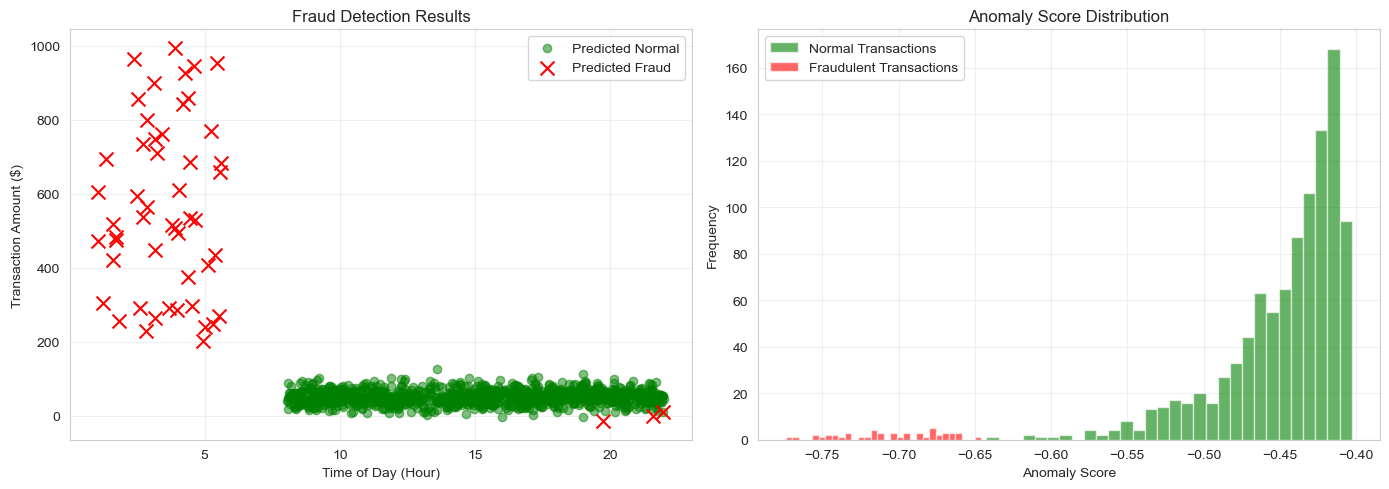

✅ Fraud detection visualization complete!

💡 Key Insights:
   • Fraudulent transactions have lower anomaly scores
   • Clear separation between normal and fraudulent patterns
   • Some overlap is normal (real-world complexity)


In [8]:
# Get anomaly scores for credit card data
fraud_scores = fraud_detector.score_samples(X_credit)

plt.figure(figsize=(14, 5))

# Plot 1: Detection Results
plt.subplot(1, 2, 1)
plt.scatter(times[fraud_labels == 0], amounts[fraud_labels == 0],
           c='green', alpha=0.5, label='Predicted Normal')
plt.scatter(times[fraud_labels == 1], amounts[fraud_labels == 1],
           c='red', s=100, marker='x', label='Predicted Fraud')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Transaction Amount ($)')
plt.title('Fraud Detection Results')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Anomaly Score Distribution
plt.subplot(1, 2, 2)
plt.hist(fraud_scores[y_true == 0], bins=30, alpha=0.6, 
        label='Normal Transactions', color='green')
plt.hist(fraud_scores[y_true == 1], bins=30, alpha=0.6, 
        label='Fraudulent Transactions', color='red')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Anomaly Score Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Fraud detection visualization complete!")
print("\n💡 Key Insights:")
print("   • Fraudulent transactions have lower anomaly scores")
print("   • Clear separation between normal and fraudulent patterns")
print("   • Some overlap is normal (real-world complexity)")

---
## Part 8: Tuning Contamination Parameter ⚙️

The contamination parameter controls how many anomalies we expect. Let's see its effect!

📊 Impact of Contamination Parameter:
 contamination  precision  recall       f1  flagged
          0.01   1.000000    0.22 0.360656       11
          0.05   0.943396    1.00 0.970874       53
          0.10   0.476190    1.00 0.645161      105
          0.15   0.316456    1.00 0.480769      158
          0.20   0.238095    1.00 0.384615      210


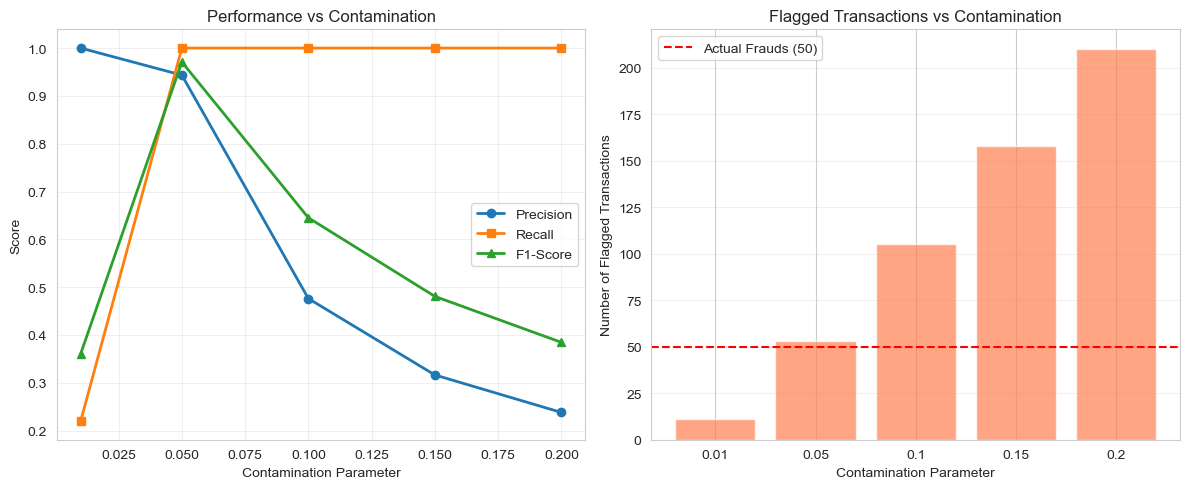


💡 Key Takeaway:
   Best contamination value: 0.05
   (Maximizes F1-Score)


In [9]:
# Test different contamination values
contamination_values = [0.01, 0.05, 0.10, 0.15, 0.20]
results = []

for contamination in contamination_values:
    # Train model
    model = IsolationForest(contamination=contamination, random_state=42)
    predictions = model.fit_predict(X_credit)
    pred_labels = (predictions == -1).astype(int)
    
    # Calculate metrics
    precision = precision_score(y_true, pred_labels)
    recall = recall_score(y_true, pred_labels)
    f1 = f1_score(y_true, pred_labels)
    
    results.append({
        'contamination': contamination,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'flagged': np.sum(pred_labels)
    })

# Create results DataFrame
results_df = pd.DataFrame(results)

print("📊 Impact of Contamination Parameter:")
print("="*70)
print(results_df.to_string(index=False))
print("="*70)

# Visualize impact
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(results_df['contamination'], results_df['precision'], 
        marker='o', label='Precision', linewidth=2)
plt.plot(results_df['contamination'], results_df['recall'], 
        marker='s', label='Recall', linewidth=2)
plt.plot(results_df['contamination'], results_df['f1'], 
        marker='^', label='F1-Score', linewidth=2)
plt.xlabel('Contamination Parameter')
plt.ylabel('Score')
plt.title('Performance vs Contamination')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(results_df['contamination'].astype(str), results_df['flagged'], 
       color='coral', alpha=0.7)
plt.axhline(y=50, color='red', linestyle='--', label='Actual Frauds (50)')
plt.xlabel('Contamination Parameter')
plt.ylabel('Number of Flagged Transactions')
plt.title('Flagged Transactions vs Contamination')
plt.legend()
plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n💡 Key Takeaway:")
best_idx = results_df['f1'].idxmax()
best_contamination = results_df.loc[best_idx, 'contamination']
print(f"   Best contamination value: {best_contamination}")
print(f"   (Maximizes F1-Score)")

---
## Part 9: Anomaly Detection vs Classification 🤔

Let's compare Isolation Forest with a traditional classification model!

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split data for supervised learning
X_train, X_test, y_train, y_test = train_test_split(
    X_credit, y_true, test_size=0.3, random_state=42, stratify=y_true
)

print("🔄 Comparing Two Approaches:")
print("="*60)

# Approach 1: Isolation Forest (Unsupervised)
print("\n1️⃣ Isolation Forest (Unsupervised):")
iso_model = IsolationForest(contamination=0.05, random_state=42)
iso_model.fit(X_train)  # Only needs X, no labels!
iso_pred = (iso_model.predict(X_test) == -1).astype(int)

iso_precision = precision_score(y_test, iso_pred)
iso_recall = recall_score(y_test, iso_pred)
iso_f1 = f1_score(y_test, iso_pred)

print(f"   ✅ No labels needed for training")
print(f"   Precision: {iso_precision*100:.1f}%")
print(f"   Recall: {iso_recall*100:.1f}%")
print(f"   F1-Score: {iso_f1*100:.1f}%")

# Approach 2: Random Forest (Supervised)
print("\n2️⃣ Random Forest Classifier (Supervised):")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Needs both X and labels!
rf_pred = rf_model.predict(X_test)

rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print(f"   ⚠️ Requires labeled training data")
print(f"   Precision: {rf_precision*100:.1f}%")
print(f"   Recall: {rf_recall*100:.1f}%")
print(f"   F1-Score: {rf_f1*100:.1f}%")

# Comparison
print("\n📊 Comparison:")
print("="*60)
comparison = pd.DataFrame({
    'Method': ['Isolation Forest', 'Random Forest'],
    'Type': ['Unsupervised', 'Supervised'],
    'Labels Needed': ['No ✅', 'Yes ⚠️'],
    'Precision': [f'{iso_precision:.3f}', f'{rf_precision:.3f}'],
    'Recall': [f'{iso_recall:.3f}', f'{rf_recall:.3f}'],
    'F1-Score': [f'{iso_f1:.3f}', f'{rf_f1:.3f}']
})
print(comparison.to_string(index=False))

print("\n💡 When to Use Each:")
print("   🌲 Isolation Forest: No labels, rare anomalies, unknown fraud patterns")
print("   🌳 Random Forest: Have labeled data, known fraud patterns")

🔄 Comparing Two Approaches:

1️⃣ Isolation Forest (Unsupervised):
   ✅ No labels needed for training
   Precision: 100.0%
   Recall: 100.0%
   F1-Score: 100.0%

2️⃣ Random Forest Classifier (Supervised):
   ⚠️ Requires labeled training data
   Precision: 100.0%
   Recall: 100.0%
   F1-Score: 100.0%

📊 Comparison:
          Method         Type Labels Needed Precision Recall F1-Score
Isolation Forest Unsupervised          No ✅     1.000  1.000    1.000
   Random Forest   Supervised        Yes ⚠️     1.000  1.000    1.000

💡 When to Use Each:
   🌲 Isolation Forest: No labels, rare anomalies, unknown fraud patterns
   🌳 Random Forest: Have labeled data, known fraud patterns


---
## 🎯 Beginner Challenge

**Your Task:**
Create an anomaly detection system for network traffic monitoring!

**Scenario:**
You're monitoring website traffic. Normal traffic has:
- Request rate: 10-50 requests/minute
- Data transfer: 100-500 KB/request

DDoS attacks have:
- Request rate: 200-1000 requests/minute
- Data transfer: 10-50 KB/request (small requests)

**Requirements:**
1. Generate synthetic network traffic data (500 normal, 25 attacks)
2. Use Isolation Forest to detect attacks
3. Visualize the detection results
4. Calculate and display precision, recall, and F1-score

**Hints:**
- Use `np.random.normal()` for normal traffic
- Use `np.random.uniform()` for attack traffic
- Set contamination to expected attack rate (~5%)
- Create scatter plot with request rate vs data transfer

**Expected Output:**
- Scatter plot showing normal traffic (blue) and detected attacks (red)
- Performance metrics (precision, recall, F1)
- Number of detected attacks vs actual attacks

**Bonus:**
- Try different contamination values
- Add a third feature (e.g., time of day)
- Compare with a classification model

In [11]:
# Your code here
# TODO: Generate normal traffic data (request_rate, data_transfer)
# TODO: Generate attack traffic data
# TODO: Combine and create feature matrix X
# TODO: Train Isolation Forest
# TODO: Make predictions
# TODO: Visualize results
# TODO: Calculate metrics

# Start coding below:


---
## 📚 Summary

### What We Learned:

**1. Anomaly Detection Fundamentals:**
- Finding unusual patterns in data (outliers)
- Unsupervised learning (no labels needed)
- Real-world applications (fraud, intrusion, quality control)
- Three types: point, contextual, collective anomalies

**2. Isolation Forest Algorithm:**
- Isolates anomalies using random decision trees
- Anomalies are easier to isolate (shorter paths)
- Returns anomaly scores (lower = more anomalous)
- Fast and scalable to large datasets

**3. Practical Implementation:**
- Using `sklearn.ensemble.IsolationForest`
- Key parameter: `contamination` (expected % of anomalies)
- `fit_predict()` returns -1 for anomalies, 1 for normal
- `score_samples()` returns anomaly scores

**4. Model Evaluation:**
- Precision: Of flagged items, how many are actually anomalies
- Recall: Of actual anomalies, how many did we catch
- F1-Score: Balance between precision and recall
- Confusion matrix for detailed analysis

**5. Anomaly Detection vs Classification:**
- Anomaly detection: Unsupervised, no labels, rare events
- Classification: Supervised, needs labels, balanced classes
- Choose based on data availability and problem type

### 🎯 Key Takeaways:
- ✅ Anomaly detection doesn't need labeled training data
- ✅ Perfect for rare events and unknown patterns
- ✅ Isolation Forest is fast and effective
- ✅ Contamination parameter is crucial (set based on expected anomaly rate)
- ✅ Visualization helps understand detection results
- ✅ Always evaluate with precision, recall, and F1-score

### 💡 Pro Tips:
- Start with contamination = expected anomaly percentage
- Visualize your data before and after detection
- Use anomaly scores for ranking suspicious cases
- Combine with domain knowledge for better results
- Consider ensemble of multiple anomaly detectors
- Monitor false positive rate in production systems

### 🚀 Next Steps:
- Apply anomaly detection in the module project
- Try other algorithms (Local Outlier Factor, One-Class SVM)
- Explore time-series anomaly detection
- Build real-time anomaly detection systems

---

**Great job! You've mastered Anomaly Detection! 🎉**

You can now:
- ✅ Detect unusual patterns in data
- ✅ Implement Isolation Forest
- ✅ Visualize and interpret anomalies
- ✅ Evaluate detection performance
- ✅ Apply to real-world problems (fraud, security, quality control)

**Ready for the Week 7 Module Project!** 🚀